In [11]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/National Unit-data.csv'  
df = pd.read_csv(file_path)

df_filtered = df[(df['Metric'] == 'Incidence Rate') & (df['Value'].notnull())]

df_filtered = df_filtered[df_filtered['Year'] == 2020]

print("筛选后的数据预览：")
print(df_filtered.head())

df_grouped = df_filtered.groupby(['ISO3', 'Name']).agg({'Value': 'mean'}).reset_index()

print("\n分组后的数据预览：")
print(df_grouped.head())

df_grouped.to_csv('/path/to/filtered_malaria_data.csv', index=False)


筛选后的数据预览：
   ISO3         Name Admin Level          Metric               Units  Year  \
10  AFG  Afghanistan      admin0  Incidence Rate  Cases per Thousand  2020   
23  AGO       Angola      admin0  Incidence Rate  Cases per Thousand  2020   
36  ARG    Argentina      admin0  Incidence Rate  Cases per Thousand  2020   
49  ARM      Armenia      admin0  Incidence Rate  Cases per Thousand  2020   
62  AZE   Azerbaijan      admin0  Incidence Rate  Cases per Thousand  2020   

         Value  
10    0.274987  
23  235.067713  
36    0.000000  
49    0.000000  
62    0.000000  

分组后的数据预览：
  ISO3         Name       Value
0  AFG  Afghanistan    0.274987
1  AGO       Angola  235.067713
2  ARG    Argentina    0.000000
3  ARM      Armenia    0.000000
4  AZE   Azerbaijan    0.000000


OSError: Cannot save file into a non-existent directory: '/path/to'

In [15]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/National Unit-data.csv'  
df = pd.read_csv(file_path)

print("数据预览：")
print(df.head())

print("数据中包含的国家：", df['ISO3'].nunique())
print("国家列表：", df['ISO3'].unique())


数据预览：
  ISO3    Name Admin Level          Metric               Units  Year  \
0  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2010   
1  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2011   
2  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2012   
3  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2013   
4  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2014   

        Value  
0  170.528639  
1  156.720342  
2  153.045672  
3  156.944737  
4  164.041127  
数据中包含的国家： 50
国家列表： ['AGO' 'BDI' 'BEN' 'BFA' 'BWA' 'CAF' 'CIV' 'CMR' 'COD' 'COG' 'COM' 'CPV'
 'DJI' 'DZA' 'ERI' 'ETH' 'GAB' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'KEN' 'LBR'
 'MAR' 'MDG' 'MLI' 'MOZ' 'MRT' 'MWI' 'MYT' 'NAM' 'NER' 'NGA' 'RWA' 'SDN'
 'SEN' 'SLE' 'SOM' 'SSD' 'STP' 'SUR' 'SWZ' 'TCD' 'TGO' 'TZA' 'UGA' 'ZAF'
 'ZMB' 'ZWE']


In [4]:
import pandas as pd
import plotly.express as px

file_path = '/Users/MinxuanLuo/Desktop/National Unit-data.csv'  
df = pd.read_csv(file_path)

print("Data Preview:")
print(df.head())
print(f"Number of countries included: {df['ISO3'].nunique()}")
print(f"List of countries: {df['ISO3'].unique()}")

fig = px.choropleth(
    df,
    locations="ISO3",                   # Use ISO-3 codes for countries
    locationmode="ISO-3",               # Match locations to ISO-3 codes
    color="Value",                      # Color based on malaria incidence rate
    animation_frame="Year",             # Add a time slider based on Year
    hover_name="Name",                  # Show country name on hover
    hover_data={"Value": True},         # Show malaria incidence value on hover
    color_continuous_scale=px.colors.sequential.YlOrRd,  # Color scale
    range_color=[0, df['Value'].max()], # Define color range
    title="Malaria Incidence Rate in Africa"  # Map title
)

fig.update_geos(
    scope='africa',                     # Restrict the map to Africa
    showcoastlines=True,                # Display coastlines
    coastlinecolor="Gray",              # Coastline color
    showland=True,                      # Highlight land areas
    landcolor="white"                   # Land color
)

# Display the map
fig.show()

fig.write_html("/Users/MinxuanLuo/Desktop/africa_malaria_dynamic_map.html")
print("Dynamic map has been saved to your Desktop as 'africa_malaria_dynamic_map.html'")


Data Preview:
  ISO3    Name Admin Level          Metric               Units  Year  \
0  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2010   
1  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2011   
2  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2012   
3  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2013   
4  AGO  Angola      admin0  Incidence Rate  Cases per Thousand  2014   

        Value  
0  170.528639  
1  156.720342  
2  153.045672  
3  156.944737  
4  164.041127  
Number of countries included: 50
List of countries: ['AGO' 'BDI' 'BEN' 'BFA' 'BWA' 'CAF' 'CIV' 'CMR' 'COD' 'COG' 'COM' 'CPV'
 'DJI' 'DZA' 'ERI' 'ETH' 'GAB' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'KEN' 'LBR'
 'MAR' 'MDG' 'MLI' 'MOZ' 'MRT' 'MWI' 'MYT' 'NAM' 'NER' 'NGA' 'RWA' 'SDN'
 'SEN' 'SLE' 'SOM' 'SSD' 'STP' 'SUR' 'SWZ' 'TCD' 'TGO' 'TZA' 'UGA' 'ZAF'
 'ZMB' 'ZWE']


Dynamic map has been saved to your Desktop as 'africa_malaria_dynamic_map.html'


/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



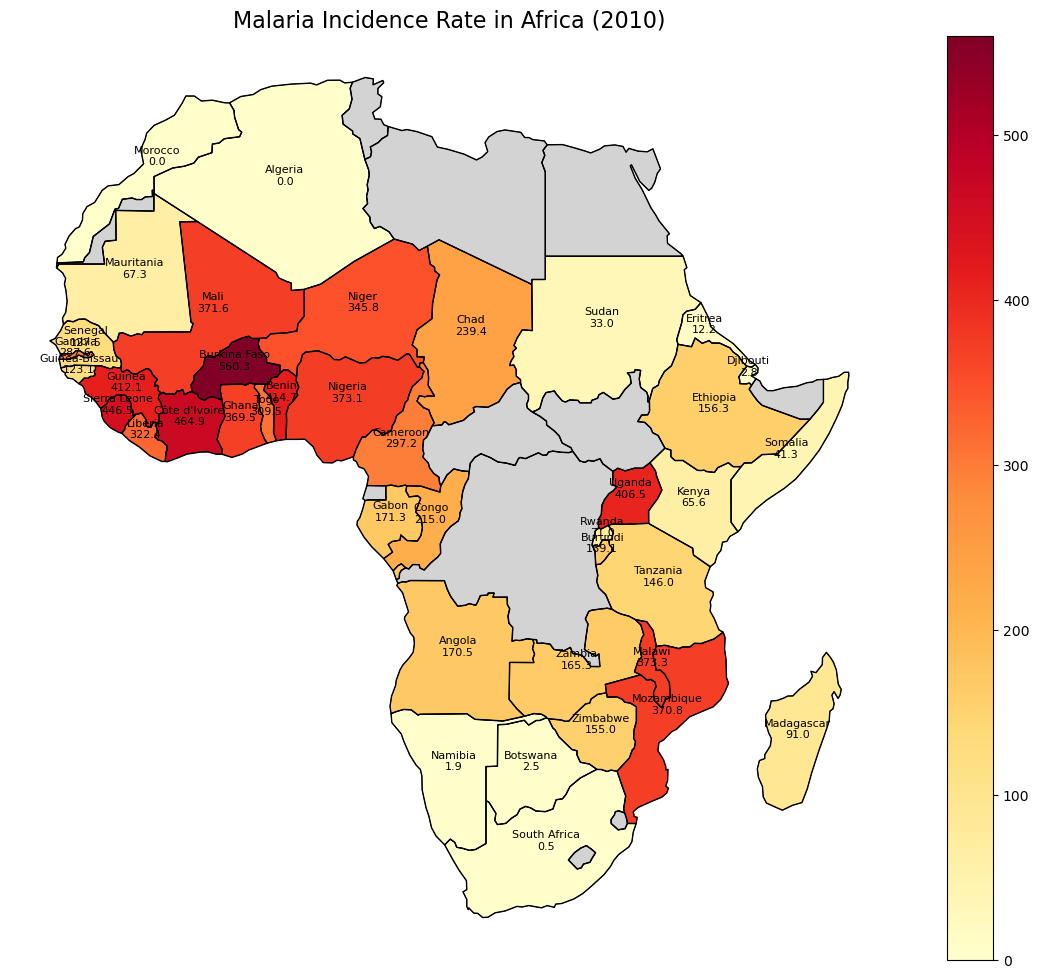

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

file_path = '/Users/MinxuanLuo/Desktop/National Unit-data.csv'  
df = pd.read_csv(file_path)

year = 2010
df_2010 = df[df['Year'] == year]

africa_shapefile = gpd.datasets.get_path('naturalearth_lowres')  
gdf = gpd.read_file(africa_shapefile)

gdf_africa = gdf[gdf['continent'] == 'Africa']

gdf_africa = gdf_africa.merge(df_2010, left_on='name', right_on='Name', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

gdf_africa.boundary.plot(ax=ax, linewidth=0.5, color='black')  
gdf_africa.plot(column='Value', ax=ax, cmap='YlOrRd', legend=True, edgecolor='black', missing_kwds={
    "color": "lightgrey",
    "label": "No Data"
})

for _, row in gdf_africa.iterrows():
    if pd.notnull(row['Value']):  
        plt.text(
            row.geometry.centroid.x,  
            row.geometry.centroid.y,  
            f"{row['name']}\n{row['Value']:.1f}",  
            ha='center', fontsize=8, color="black"
        )

ax.set_title(f"Malaria Incidence Rate in Africa ({year})", fontsize=16)
ax.axis("off")

plt.savefig("africa_malaria_map.png", dpi=300, bbox_inches="tight")

plt.show()


/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



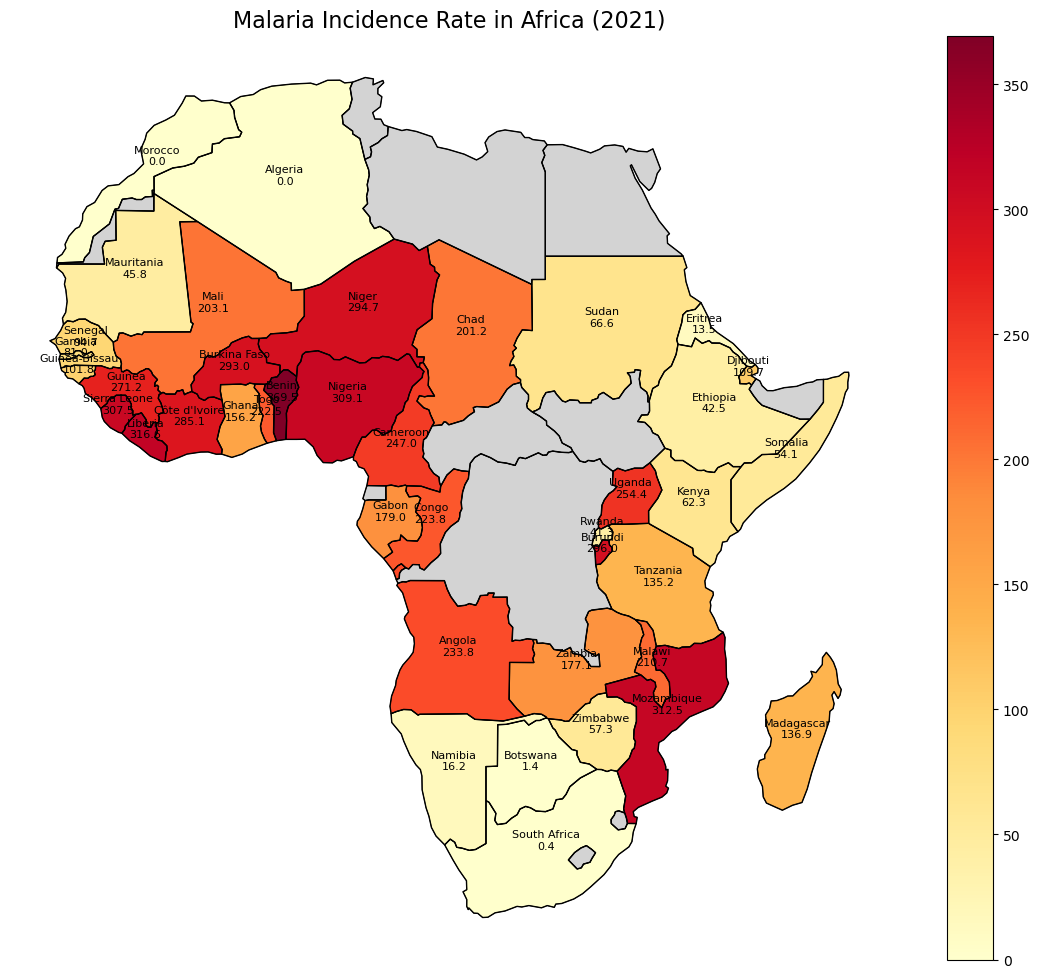

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

file_path = '/Users/MinxuanLuo/Desktop/National Unit-data.csv'  
df = pd.read_csv(file_path)

year = 2021
df_2021 = df[df['Year'] == year]

africa_shapefile = gpd.datasets.get_path('naturalearth_lowres')  
gdf = gpd.read_file(africa_shapefile)

gdf_africa = gdf[gdf['continent'] == 'Africa']

gdf_africa = gdf_africa.merge(df_2021, left_on='name', right_on='Name', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

gdf_africa.boundary.plot(ax=ax, linewidth=0.5, color='black')  
gdf_africa.plot(column='Value', ax=ax, cmap='YlOrRd', legend=True, edgecolor='black', missing_kwds={
    "color": "lightgrey",
    "label": "No Data"
})

for _, row in gdf_africa.iterrows():
    if pd.notnull(row['Value']):  
        plt.text(
            row.geometry.centroid.x,  
            row.geometry.centroid.y,  
            f"{row['name']}\n{row['Value']:.1f}",  
            ha='center', fontsize=8, color="black"
        )

ax.set_title(f"Malaria Incidence Rate in Africa ({year})", fontsize=16)
ax.axis("off")

plt.savefig("africa_malaria_map_2021.png", dpi=300, bbox_inches="tight")

plt.show()


/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



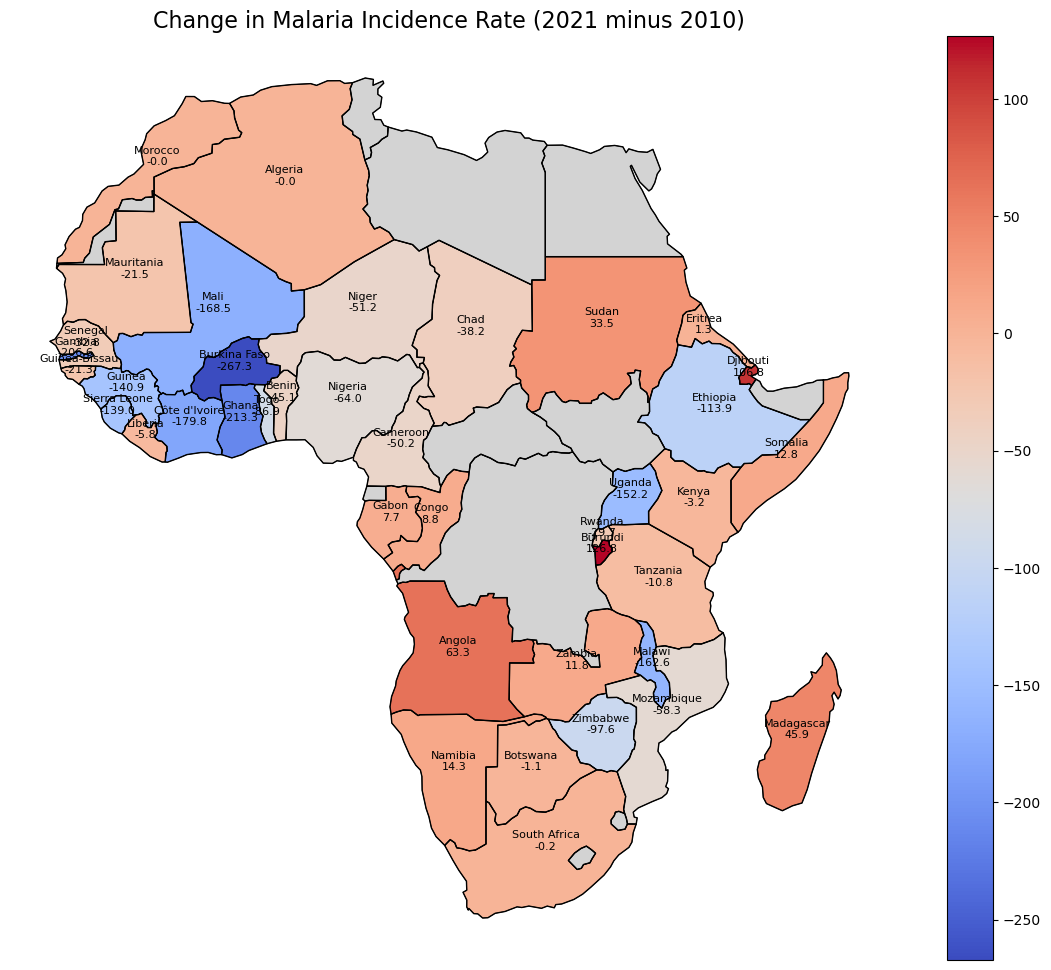

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

file_path = '/Users/MinxuanLuo/Desktop/National Unit-data.csv'  
df = pd.read_csv(file_path)

df_2010 = df[df['Year'] == 2010]
df_2021 = df[df['Year'] == 2021]

df_diff = pd.merge(df_2021, df_2010, on='Name', suffixes=('_2021', '_2010'))
df_diff['Value_Diff'] = df_diff['Value_2021'] - df_diff['Value_2010']

africa_shapefile = gpd.datasets.get_path('naturalearth_lowres')  
gdf = gpd.read_file(africa_shapefile)

gdf_africa = gdf[gdf['continent'] == 'Africa']

gdf_africa = gdf_africa.merge(df_diff[['Name', 'Value_Diff']], left_on='name', right_on='Name', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

gdf_africa.boundary.plot(ax=ax, linewidth=0.5, color='black')  
gdf_africa.plot(column='Value_Diff', ax=ax, cmap='coolwarm', legend=True, edgecolor='black', missing_kwds={
    "color": "lightgrey",
    "label": "No Data"
})

for _, row in gdf_africa.iterrows():
    if pd.notnull(row['Value_Diff']):  
        plt.text(
            row.geometry.centroid.x,  
            row.geometry.centroid.y,  
            f"{row['name']}\n{row['Value_Diff']:.1f}",  
            ha='center', fontsize=8, color="black"
        )

ax.set_title("Change in Malaria Incidence Rate (2021 minus 2010)", fontsize=16)
ax.axis("off")

plt.savefig("africa_malaria_diff_map.png", dpi=300, bbox_inches="tight")

plt.show()
